Task-3

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.
Sample Dateset :- https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo
bank_marketing= fetch_ucirepo(id=222)
X = bank_marketing.data.features
y = bank_marketing.data.targets
print(bank_marketing.metadata)
print(bank_marketing.variables)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [4]:
url="https://archive.ics.uci.edu/static/public/222/data.csv"

In [5]:
import requests
new_file_name ='Marketing_Dataset.csv'
response = requests.get(url)
if response.status_code == 200:
    
    with open(new_file_name, 'wb') as file:
        file.write(response.content)
    print("File downloaded and saved as", new_file_name)
else:
    print(f"Failed to download file. Status code: {response.status_code}")

File downloaded and saved as Marketing_Dataset.csv


In [6]:
data=pd.read_csv("Marketing_Dataset.csv")

In [7]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [8]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
data.count()

age            45211
job            44923
marital        45211
education      43354
default        45211
balance        45211
housing        45211
loan           45211
contact        32191
day_of_week    45211
month          45211
duration       45211
campaign       45211
pdays          45211
previous       45211
poutcome        8252
y              45211
dtype: int64

In [11]:
data.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
print(data.isnull().sum())

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64


In [13]:
len(data)

45211

In [14]:
data.drop(columns=['poutcome'], inplace=True)

In [15]:
data['job'].unique() 

array(['management', 'technician', 'entrepreneur', 'blue-collar', nan,
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [16]:
data['education'].unique() 

array(['tertiary', 'secondary', nan, 'primary'], dtype=object)

In [17]:
data['contact'].unique() 

array([nan, 'cellular', 'telephone'], dtype=object)

In [18]:
data['job'].fillna(data['job'].mode()[0], inplace=True)

In [19]:
data['education'].fillna(data['education'].mode()[0], inplace=True)

In [20]:
data['contact'].fillna(data['contact'].mode()[0], inplace=True)

In [21]:
print(data.isnull().sum())

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
y              0
dtype: int64


In [22]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,no


In [23]:
data_encoded = pd.get_dummies(data, drop_first=True)

In [24]:
X = data_encoded.drop('y_yes', axis=1)  
y = data_encoded['y_yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8652314951341787


In [27]:
conf_matrix=confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:{conf_matrix}')

Confusion Matrix:[[11011   955]
 [  873   725]]


In [28]:
class_re=classification_report(y_test, y_pred)
print(f'Classification Report:{class_re}')

Classification Report:              precision    recall  f1-score   support

           0       0.93      0.92      0.92     11966
           1       0.43      0.45      0.44      1598

    accuracy                           0.87     13564
   macro avg       0.68      0.69      0.68     13564
weighted avg       0.87      0.87      0.87     13564



In [29]:
import seaborn as sns

<AxesSubplot: xlabel='count', ylabel='job'>

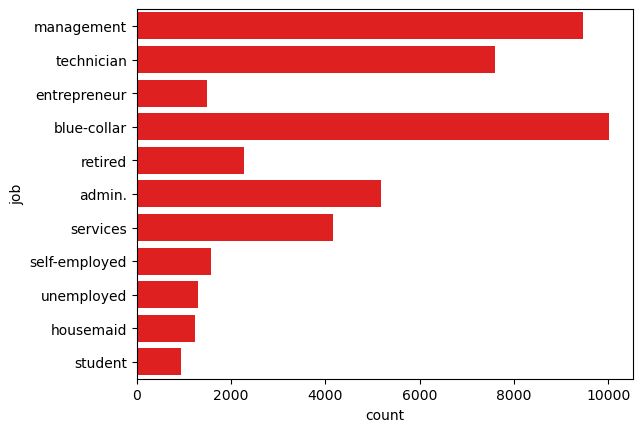

In [30]:
sns.countplot(y='job',data=data,color='red' )

<AxesSubplot: xlabel='Count', ylabel='age'>

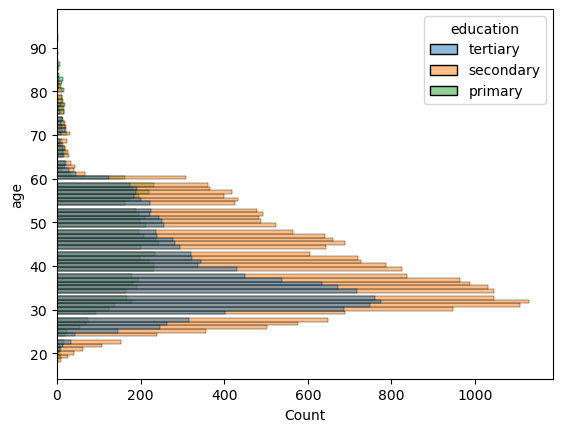

In [31]:
sns.histplot(y='age',hue='education',data=data,color='red' )

<AxesSubplot: xlabel='marital', ylabel='count'>

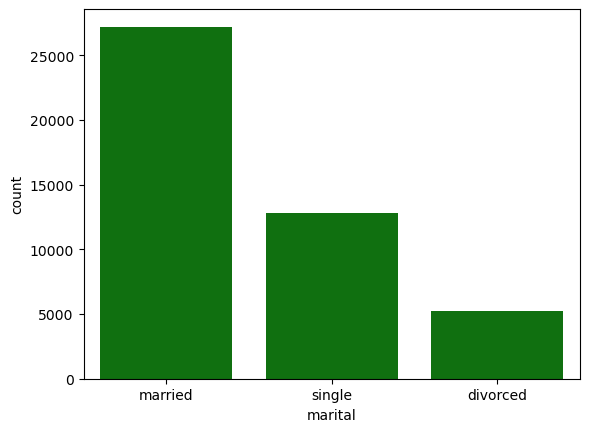

In [32]:
sns.countplot(x='marital',data=data,color='green' )

<AxesSubplot: xlabel='age', ylabel='Count'>

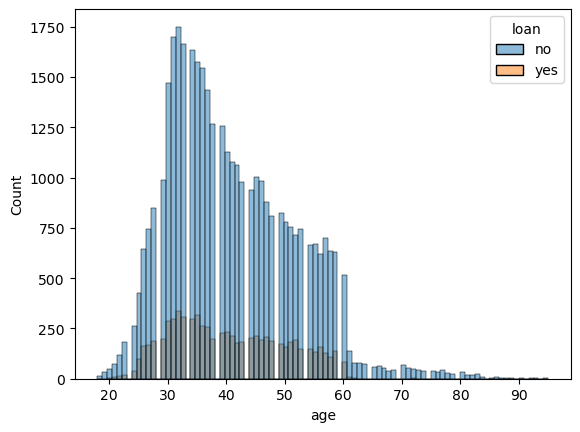

In [33]:
sns.histplot(x='age',hue='loan',data=data,color='black' )

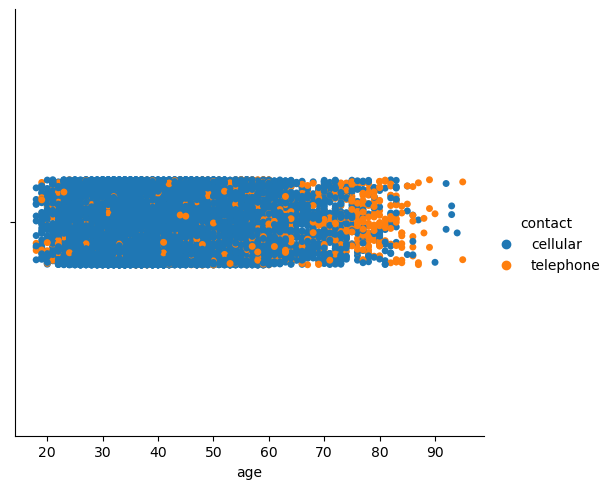

In [34]:
sns.catplot(x='age',hue='contact',data=data )

<AxesSubplot: xlabel='day_of_week', ylabel='Count'>

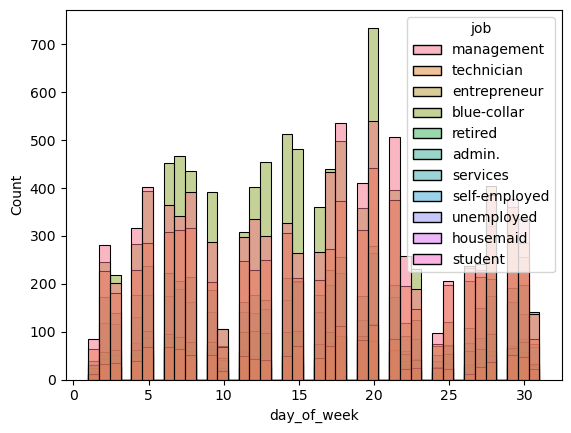

In [35]:
sns.histplot(x='day_of_week',hue='job',data=data )

<AxesSubplot: xlabel='age', ylabel='Count'>

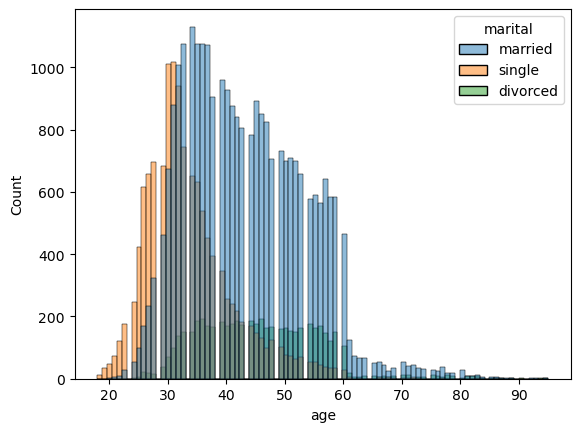

In [36]:
sns.histplot(x='age',hue='marital',data=data )

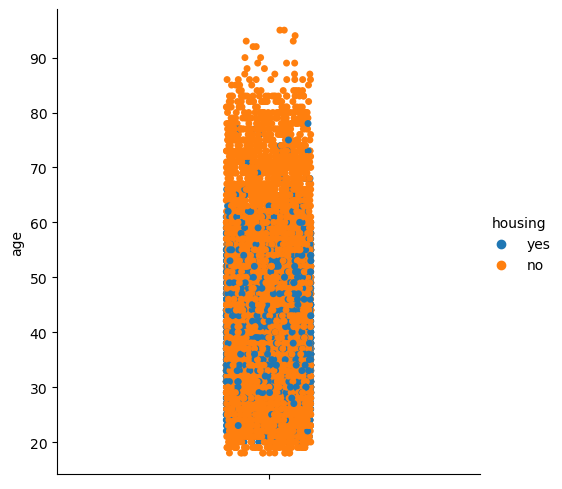

In [37]:
sns.catplot(y='age',hue='housing',data=data )

In [ ]:
sns.pairplot(data,hue='age', diag_kind='kde')

In [ ]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['no', 'yes'])
plt.show()